# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [2]:
df=pd.read_csv('Data/diabetes_prediction_dataset.csv')

## Data Exploration

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


- From the dataset we can see there are **4 Independent Categorical Features** and **1 Dependent Categorical Feature**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# EDA

## Univariate Analysis

In [5]:
df.diabetes.value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

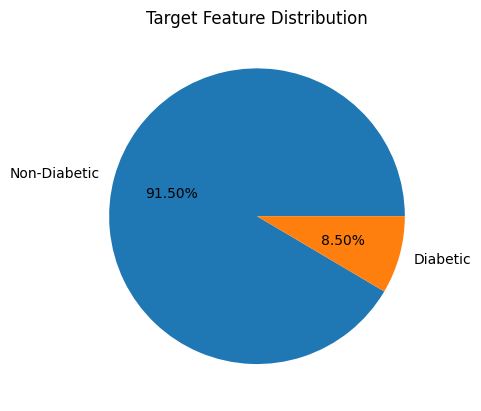

In [6]:
plt.pie(df['diabetes'].value_counts(),autopct='%0.2f%%',labels=['Non-Diabetic','Diabetic'])
plt.title('Target Feature Distribution')
plt.show()

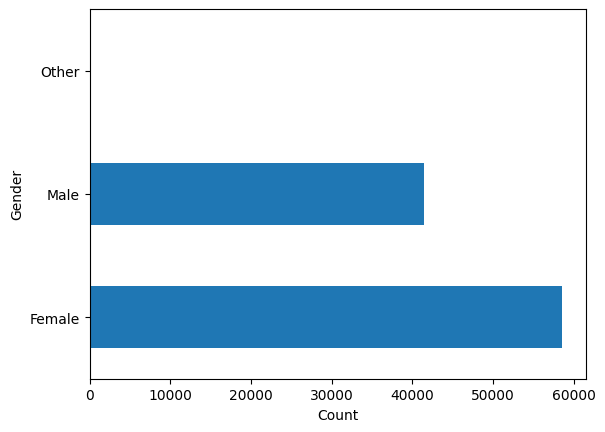

In [7]:
df['gender'].value_counts().plot(kind='barh',ylabel='Gender',xlabel='Count')
plt.show()

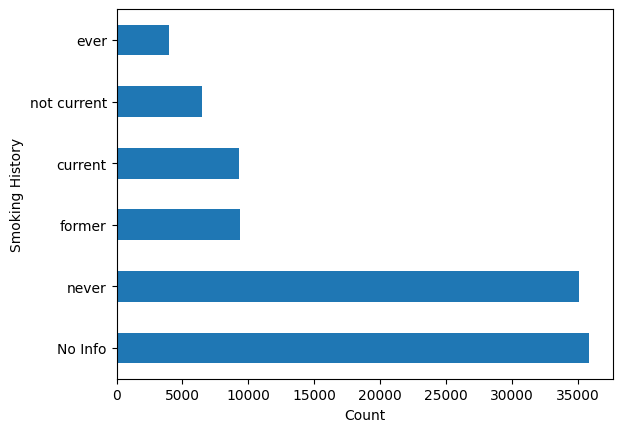

In [8]:
df['smoking_history'].value_counts().plot(kind='barh',ylabel='Smoking History',xlabel='Count')
plt.show()

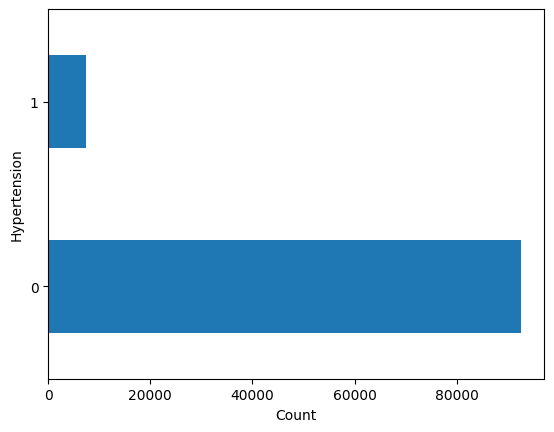

In [9]:
df['hypertension'].value_counts().plot(kind='barh',ylabel='Hypertension',xlabel='Count')
plt.show()

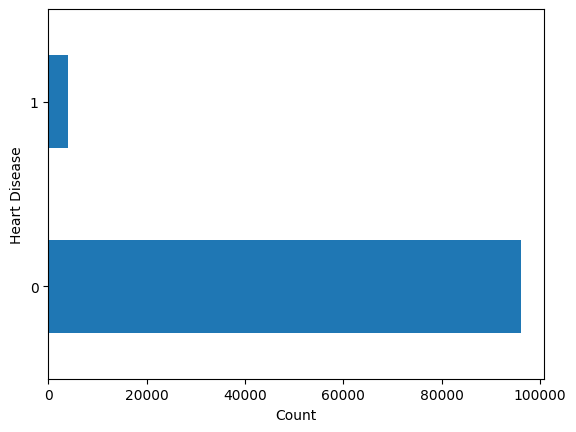

In [10]:
df['heart_disease'].value_counts().plot(kind='barh',ylabel='Heart Disease',xlabel='Count')
plt.show()

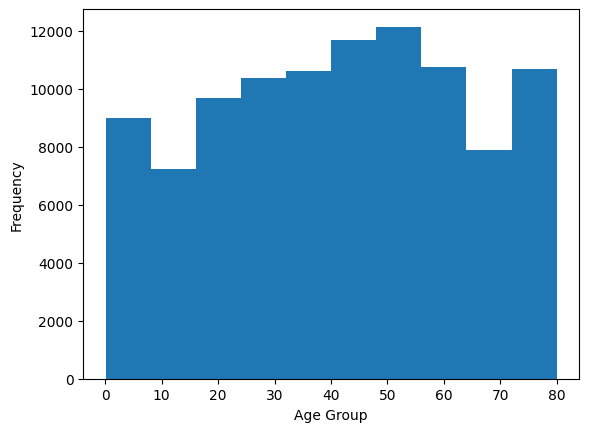

In [11]:
df['age'].plot(kind='hist',xlabel='Age Group')
plt.show()

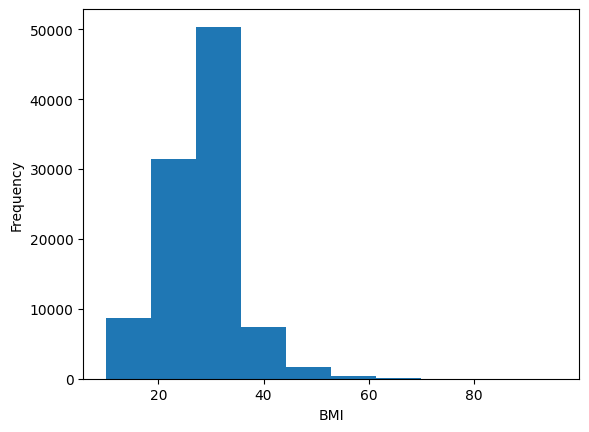

In [12]:
df['bmi'].plot(kind='hist',xlabel='BMI')
plt.show()

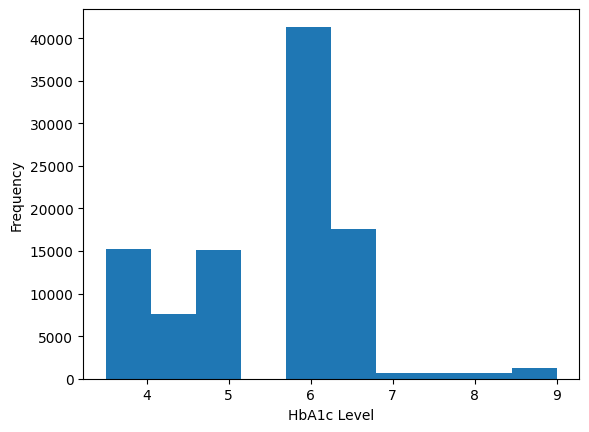

In [13]:
df['HbA1c_level'].plot(kind='hist', xlabel='HbA1c Level')
plt.show()

### Insights

- The dataset is **Imbalanced**.
- We have mostly **Female Data**.
- Count of People not having **Heart Disease** is **Higher**.
- We have the data more for **Non Smokers and Without any info**.

## Bi-Variate Analysis

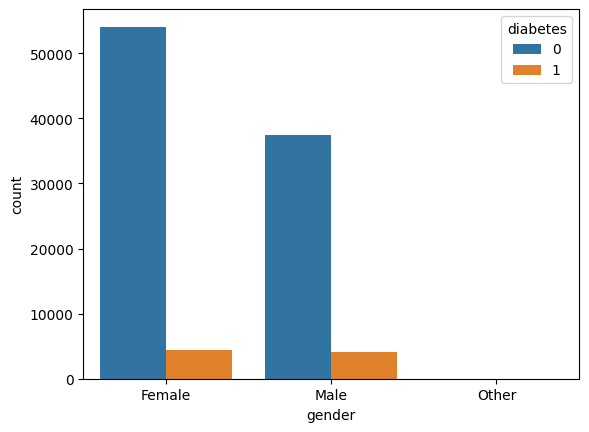

In [14]:
sns.countplot(data=df,x='gender',hue='diabetes')
plt.show()

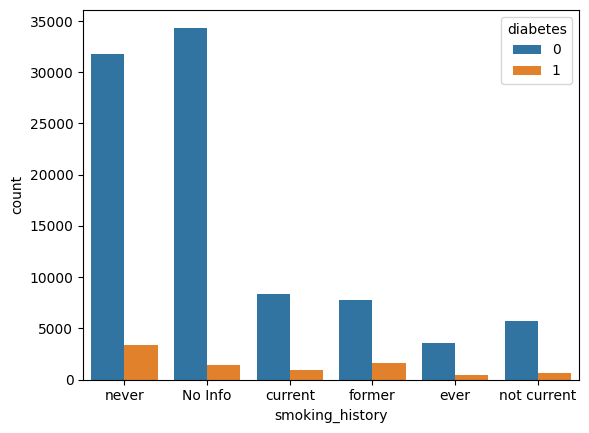

In [15]:
sns.countplot(data=df,x='smoking_history',hue='diabetes')
plt.show()

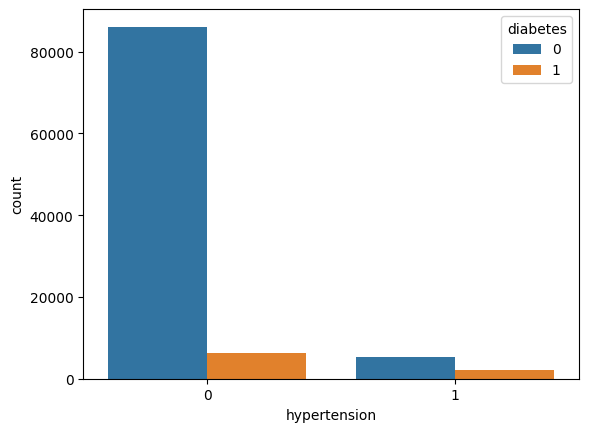

In [16]:
sns.countplot(data=df,x='hypertension',hue='diabetes')
plt.show()

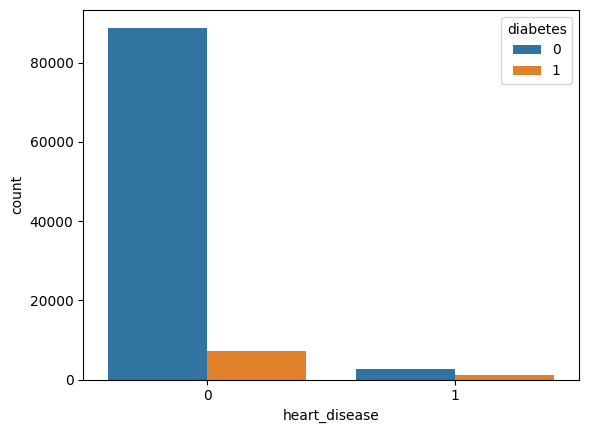

In [17]:
sns.countplot(data=df,x='heart_disease',hue='diabetes')
plt.show()

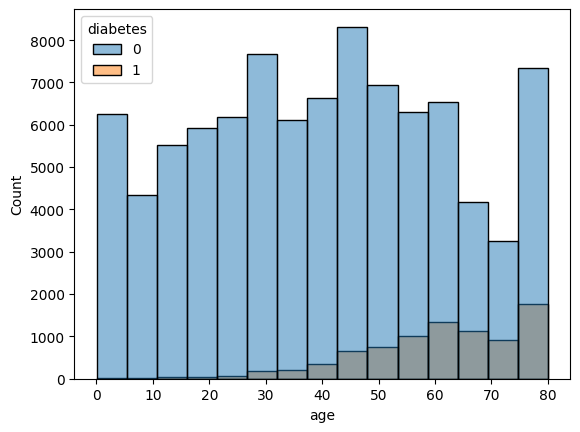

In [18]:
sns.histplot(data=df,x='age',hue='diabetes',bins=15)
plt.show()

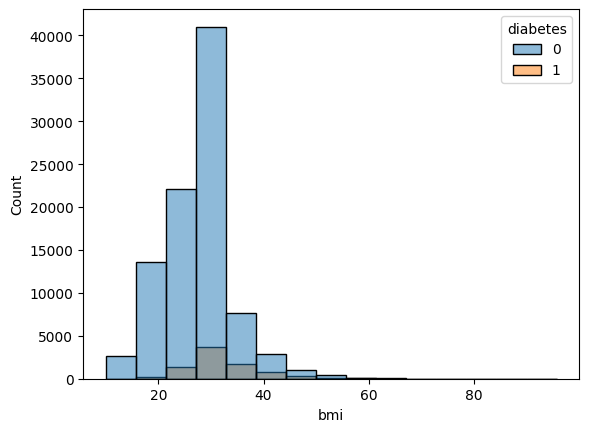

In [19]:
sns.histplot(data=df,x='bmi',hue='diabetes',bins=15)
plt.show()

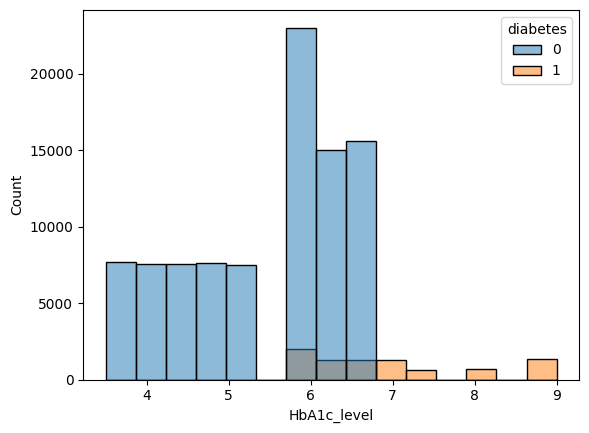

In [20]:
sns.histplot(data=df,x='HbA1c_level',hue='diabetes',bins=15)
plt.show()

### Insights

- If **HbA1c Level** is more than **5** then the chances of having **Diabetes is High**.
- Chances of **Diabetes is High** in peoples above **Age 20**.
- **Females** have **Higher** risk of Diabetes.

<Figure size 1500x1500 with 0 Axes>

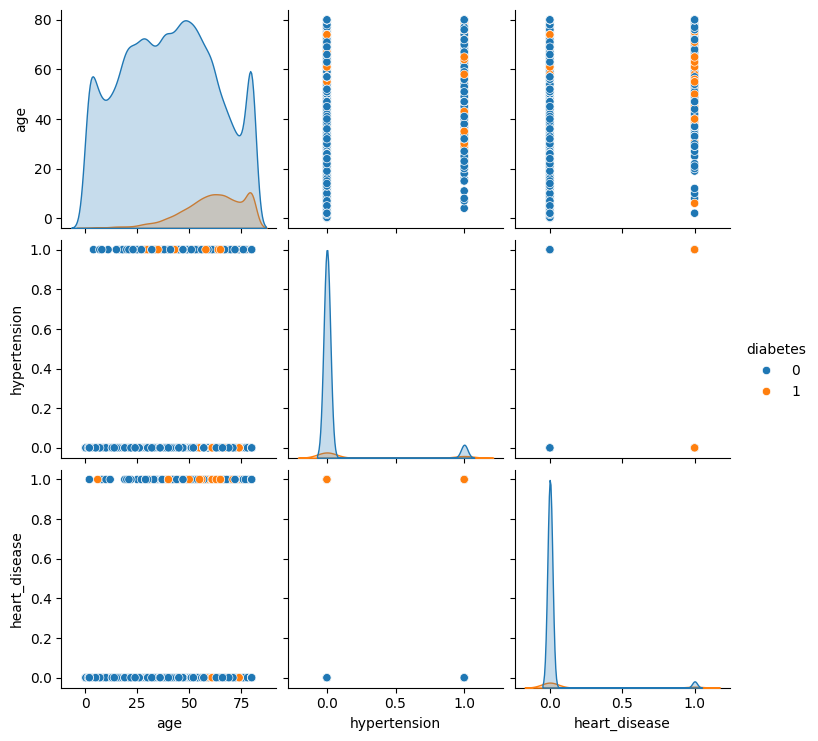

In [21]:
plt.figure(figsize=(15,15))
sns.pairplot(data=df[['age','hypertension','heart_disease','diabetes']],hue='diabetes')
plt.show()

<Figure size 1500x1500 with 0 Axes>

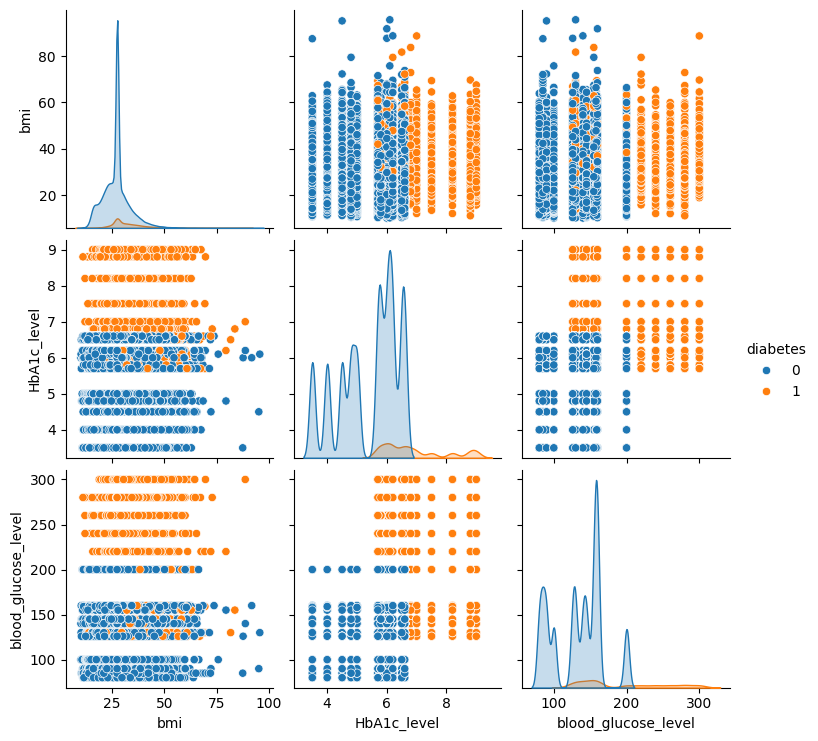

In [22]:
plt.figure(figsize=(15,15))
sns.pairplot(data=df[['bmi','HbA1c_level','blood_glucose_level','diabetes']],hue='diabetes')
plt.show()

# Model Building

In [23]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [24]:
df.drop(columns=['gender','smoking_history']).corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


## Independent Categorical Features

### Number of Classes

In [25]:
print('Gender :',df['gender'].nunique())
print('Smoking History :',df['smoking_history'].nunique())

Gender : 3
Smoking History : 6


In [26]:
print('Gender :',df['gender'].unique())
print('Smoking History :',df['smoking_history'].unique())

Gender : ['Female' 'Male' 'Other']
Smoking History : ['never' 'No Info' 'current' 'former' 'ever' 'not current']


### Unique Classes

In [27]:
print(df['gender'].value_counts())
print()
print(df['smoking_history'].value_counts())

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


There are too less **Other** rows for **Gender** so we can drop it.

In [28]:
df=df[df['gender']!='Other']

In [29]:
df.shape

(99982, 9)

## Label Encoding

In [30]:
model_df=df.copy()
model_df=pd.get_dummies(data=model_df,columns=['gender','smoking_history'],drop_first=True,dtype='int64')

In [31]:
model_df.corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
age,1.000000,0.251163,0.233352,0.337378,0.101343,0.110679,0.257999,-0.030369,0.030917,0.065792,0.216468,0.065423,0.067946
hypertension,0.251163,1.000000,0.121253,0.147679,0.080941,0.084436,0.197811,0.014381,0.017914,0.023131,0.083386,0.045937,0.001077
heart_disease,0.233352,0.121253,1.000000,0.061203,0.067591,0.070071,0.171718,0.077886,0.007592,0.040679,0.095184,-0.030859,0.007983
bmi,0.337378,0.147679,0.061203,1.000000,0.083017,0.091310,0.214377,-0.023023,0.053623,0.044353,0.111322,0.086803,0.035093
HbA1c_level,0.101343,0.080941,0.067591,0.083017,1.000000,0.166831,0.400696,0.020044,0.006117,0.009702,0.037303,0.010719,0.009676
blood_glucose_level,0.110679,0.084436,0.070071,0.091310,0.166831,1.000000,0.419587,0.017196,0.012450,0.006284,0.040692,0.012463,0.008725
diabetes,0.257999,0.197811,0.171718,0.214377,0.400696,0.419587,1.000000,0.037623,0.019588,0.024088,0.097901,0.027248,0.020831
gender_Male,-0.030369,0.014381,0.077886,-0.023023,0.020044,0.017196,0.037623,1.000000,0.026589,0.011005,0.049002,-0.098618,-0.011758
smoking_history_current,0.030917,0.017914,0.007592,0.053623,0.006117,0.012450,0.019588,0.026589,1.000000,-0.065347,-0.102787,-0.235307,-0.083951
smoking_history_ever,0.065792,0.023131,0.040679,0.044353,0.009702,0.006284,0.024088,0.011005,-0.065347,1.000000,-0.065603,-0.150183,-0.053581


In [32]:
model_df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,0,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,1,1,0,0,0,0


## Train Test Split

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    model_df.drop('diabetes',axis=1),
    model_df['diabetes'],
    random_state=123,
    train_size=0.8
)

## Data Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

## Model Training

### Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500,random_state=123,n_jobs=-1)
rf.fit(x_train_scaled,y_train)
rf_pred=rf.predict(x_test_scaled)

#### Model Evaluation

In [36]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18342
           1       0.94      0.70      0.80      1655

    accuracy                           0.97     19997
   macro avg       0.96      0.85      0.89     19997
weighted avg       0.97      0.97      0.97     19997



#### Confusion Matrix

Our objective is to **Minimize False Negative Rate** along with **Getting High Accuracy**.

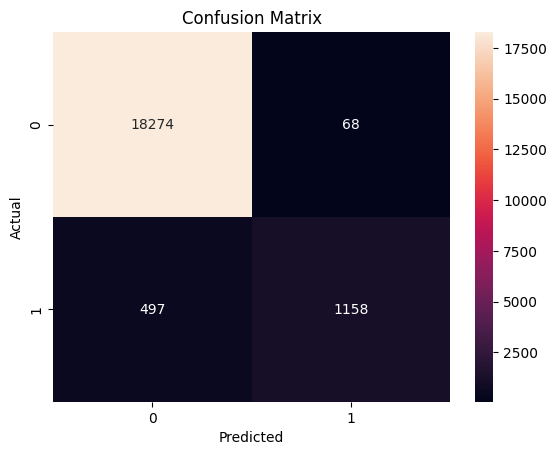

In [40]:
c_matrix=confusion_matrix(y_test,rf_pred)
sns.heatmap(c_matrix,annot=True, fmt=".0f")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [42]:
confusion_matrix=c_matrix
# Extract values from the confusion matrix
TN = confusion_matrix[0, 0]
FP = confusion_matrix[0, 1]
FN = confusion_matrix[1, 0]
TP = confusion_matrix[1, 1]

# Calculate TPR (True Positive Rate)
TPR = TP / (TP + FN)

# Calculate FPR (False Positive Rate)
FPR = FP / (FP + TN)

# Calculate TNR (True Negative Rate)
TNR = TN / (TN + FP)

# Calculate FNR (False Negative Rate)
FNR = FN / (FN + TP)

# Print the results
print(f"True Positive Rate (TPR): {TPR:.4f}")
print(f"False Positive Rate (FPR): {FPR:.4f}")
print(f"True Negative Rate (TNR): {TNR:.4f}")
print(f"False Negative Rate (FNR): {FNR:.4f}")

True Positive Rate (TPR): 0.6997
False Positive Rate (FPR): 0.0037
True Negative Rate (TNR): 0.9963
False Negative Rate (FNR): 0.3003


### Logistic Regression Classifier

In [45]:
df['diabetes'].value_counts()

diabetes
0    91482
1     8500
Name: count, dtype: int64

In [52]:
8500*10.75

91375.0

In [58]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(n_jobs=-1,random_state=123)
lr.fit(x_train_scaled,y_train)
lr_pred=lr.predict(x_test_scaled)

#### Model Evaluation

In [59]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18342
           1       0.84      0.65      0.73      1655

    accuracy                           0.96     19997
   macro avg       0.90      0.82      0.86     19997
weighted avg       0.96      0.96      0.96     19997



#### Confusion Matrix

Our objective is to **Minimize False Negative Rate** along with **Getting High Accuracy**.

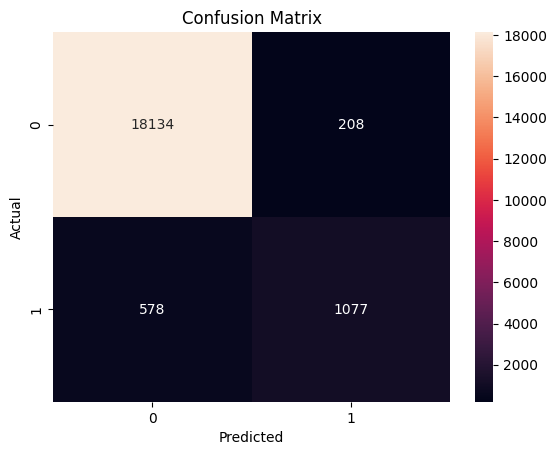

In [60]:
lr_matrix=confusion_matrix(y_test,lr_pred)
sns.heatmap(lr_matrix,annot=True, fmt=".0f")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [61]:
confusion_matrix=lr_matrix
# Extract values from the confusion matrix
TN = confusion_matrix[0, 0]
FP = confusion_matrix[0, 1]
FN = confusion_matrix[1, 0]
TP = confusion_matrix[1, 1]

# Calculate TPR (True Positive Rate)
TPR = TP / (TP + FN)

# Calculate FPR (False Positive Rate)
FPR = FP / (FP + TN)

# Calculate TNR (True Negative Rate)
TNR = TN / (TN + FP)

# Calculate FNR (False Negative Rate)
FNR = FN / (FN + TP)

# Print the results
print(f"True Positive Rate (TPR): {TPR:.4f}")
print(f"False Positive Rate (FPR): {FPR:.4f}")
print(f"True Negative Rate (TNR): {TNR:.4f}")
print(f"False Negative Rate (FNR): {FNR:.4f}")

True Positive Rate (TPR): 0.6508
False Positive Rate (FPR): 0.0113
True Negative Rate (TNR): 0.9887
False Negative Rate (FNR): 0.3492


#### Optimising Logistic Regression

Our objective is to **Minimize False Negative Rate** along with **Getting High Accuracy**.

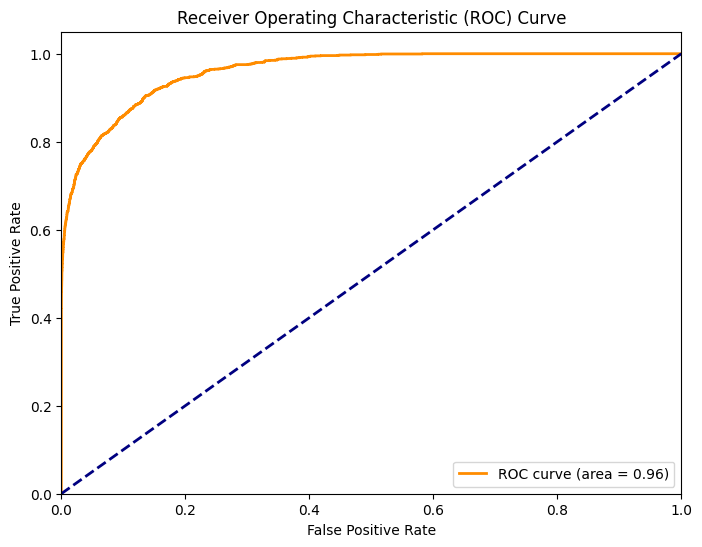

In [70]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the test set
y_scores = lr.predict_proba(x_test_scaled)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Print the optimal threshold
print(f"Optimal threshold: {optimal_threshold:.4f}")

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_scores)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [76]:
# Define a function to evaluate the model at different thresholds
def evaluate_model_at_threshold(y_true, y_scores, threshold):
    from sklearn.metrics import confusion_matrix
    y_pred = (y_scores >= threshold).astype(int)
    cm = confusion_matrix(y_true, y_pred)
    cr = classification_report(y_true, y_pred)
    return cm, cr

In [78]:
cm,cr=evaluate_model_at_threshold(y_test,y_scores,threshold=0.0647)

##### Heatmap

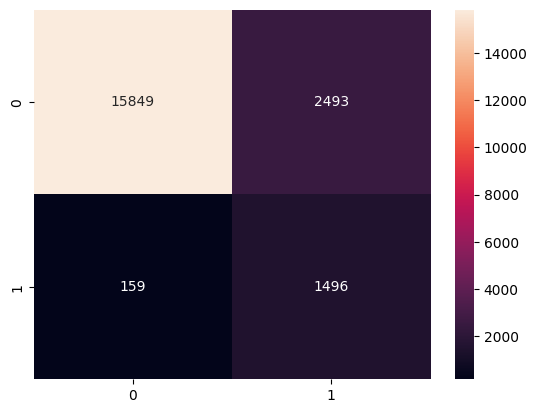

In [82]:
sns.heatmap(cm,annot=True,fmt='0.0f')
plt.show()

##### Classification Report

In [83]:
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.86      0.92     18342
           1       0.38      0.90      0.53      1655

    accuracy                           0.87     19997
   macro avg       0.68      0.88      0.73     19997
weighted avg       0.94      0.87      0.89     19997



In [86]:
confusion_matrix=cm
# Extract values from the confusion matrix
TN = confusion_matrix[0, 0]
FP = confusion_matrix[0, 1]
FN = confusion_matrix[1, 0]
TP = confusion_matrix[1, 1]

# Calculate TPR (True Positive Rate)
TPR = TP / (TP + FN)

# Calculate FPR (False Positive Rate)
FPR = FP / (FP + TN)

# Calculate TNR (True Negative Rate)
TNR = TN / (TN + FP)

# Calculate FNR (False Negative Rate)
FNR = FN / (FN + TP)

# Print the results
print(f"True Positive Rate (TPR): {TPR:.4f}")
print(f"False Positive Rate (FPR): {FPR:.4f}")
print(f"True Negative Rate (TNR): {TNR:.4f}")
print(f"False Negative Rate (FNR): {FNR:.4f}")

True Positive Rate (TPR): 0.9039
False Positive Rate (FPR): 0.1359
True Negative Rate (TNR): 0.8641
False Negative Rate (FNR): 0.0961


- False Negative Rate of **Random Forest Model** : 30%
- False Negative Rate of **Logistic Regression Model** : 34%
- False Negative Rate of **Optimized Logistic Regression Model** with threshold 0.0674 : 9%

# Applied Transformations

## Label Encoding and Standard Scaling